In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import lime
import lime.lime_tabular

For this exercise, we illustrate LIME on the wine quality dataset that can be downloaded at
https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009.

1. Importation and preprocessing

(a) Load the data

In [4]:
df = pd.read_csv(fr'C:\Users\belen\Desktop\Université de Lorraine\Second semester\Machine_learning\Lab_4\winequality-red.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


(b) The target variable is ’quality’. Separate label from features

In [9]:
X = df.drop(['quality'], axis=1)
tgt_var = df.quality

2. Learning

(a) Split the data into train and test data

In [10]:
X_train, X_test, y_train,y_test = train_test_split(X, tgt_var, test_size=0.2,random_state=42)

b) Build the model with the random forest regression algorithm

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Ajustar el modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predecir los resultados en el conjunto de prueba
y_pred_rf = rf_regressor.predict(X_test)

# Evaluar el rendimiento del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error (Random Forest): {mse_rf}")


Mean Squared Error (Random Forest): 0.30123812499999997


3. Interpretation with LIME

(a) Use the function LimeTabularExplainer to dene the LIME explainer

In [14]:
# Definir el explicador LIME
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values, 
    feature_names=X_train.columns,
    mode='regression'
)

print("LIME Tabular Explainer defined successfully.")


LIME Tabular Explainer defined successfully.


(b) Interpret now the rst record using the explainer using the function explain instance

In [15]:
# Seleccionar la primera instancia del conjunto de prueba
instance = X_test.iloc[0]

# Explicar la primera instancia
explanation = explainer.explain_instance(
    data_row=instance, 
    predict_fn=rf_regressor.predict
)

print("Explanation for the first instance generated successfully.")


Explanation for the first instance generated successfully.


c:\Users\belen\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\belen\anaconda3\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
c:\Users\belen\anaconda3\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, 

c) Display the coecients as a list

In [16]:
# Mostrar los coeficientes como una lista
coefficients = explanation.as_list()

print("Coefficients for the first instance:")
for feature, value in coefficients:
    print(f"{feature}: {value}")


Coefficients for the first instance:
9.50 < alcohol <= 10.20: -0.22417160903479813
0.62 < sulphates <= 0.73: 0.1886754565056705
0.52 < volatile acidity <= 0.64: -0.08574578502068785
chlorides > 0.09: -0.06431962480306674
38.00 < total sulfur dioxide <= 63.00: -0.028776245711971578
1.00 < density <= 1.00: -0.025047109403179727
citric acid <= 0.10: 0.021109671696720025
3.21 < pH <= 3.31: 0.016343887951180504
7.10 < fixed acidity <= 7.90: 0.016236874803139893
2.20 < residual sugar <= 2.60: -0.010279636132806242


4. Interpretation with SHAP

(a) Use the function TreeExplainer to dene the SHAP explainer on the train

In [17]:
import shap

# Crear el explicador SHAP
explainer = shap.TreeExplainer(rf_regressor, X_train)

print("SHAP TreeExplainer defined successfully.")


c:\Users\belen\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


SHAP TreeExplainer defined successfully.


(b) Display the shap values using shap values. Use summary plot to visualize

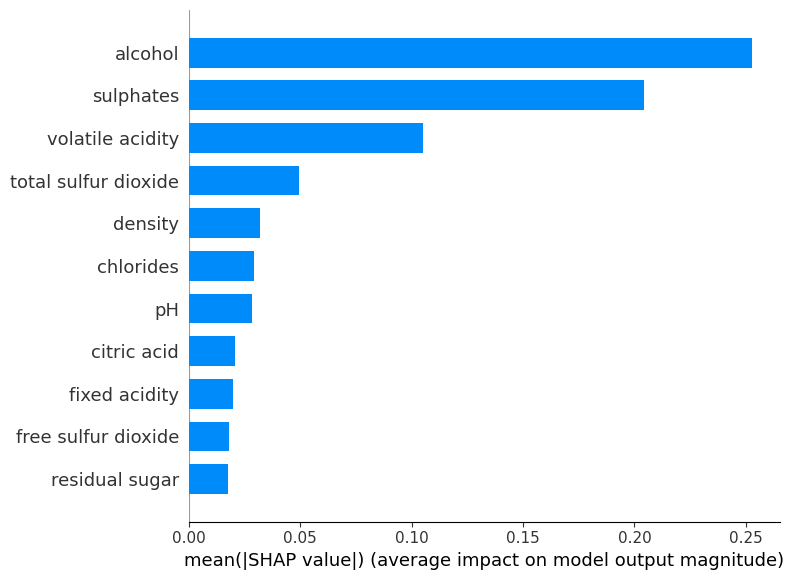

SHAP values and summary plot generated successfully.


In [18]:
# Calcular los valores SHAP para el conjunto de prueba
shap_values = explainer.shap_values(X_test)

# Visualizar los valores SHAP utilizando summary_plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

print("SHAP values and summary plot generated successfully.")
